In [18]:
import pandas as pd 
import matplotlib.pyplot as plt
from urllib.request import urlopen
import json
import re
#hello

In [19]:
from geopy.geocoders import Nominatim

In [38]:
getLoc = input("Where are you?")

geo = Nominatim(user_agent="location")

location = geo.geocode(getLoc)

print(location.address)

latitude = location.latitude
longitude = location.longitude

print("Latitude = ", latitude, "\n")
print("Longitude = ", longitude)


Houston, Harris County, Texas, United States
Latitude =  29.7589382 

Longitude =  -95.3676974


In [39]:
url_to_open ="https://api.weather.gov/points/{},{}".format(latitude, longitude)
response = urlopen(url_to_open)
json_data = response.read().decode('utf-8', 'replace')
d = json.loads(json_data)
df = pd.json_normalize(d["properties"])

response = urlopen(df["forecastHourly"][0])
json_data = response.read().decode('utf-8', 'replace')

d = json.loads(json_data)
df = pd.json_normalize(d["properties"])

df = pd.json_normalize(df["periods"][0])

In [40]:
df["day"]=0
df["hour"]=0

for i in range(df.shape[0]):
	
	# pattern to extract day
	pattern = r'(?=...........-)..'
	df["day"][i] = re.search(pattern, df["startTime"][i])[0]

	# pattern to extract hour
	pattern = r'(?=........-)..'
	df["hour"][i] = re.search(pattern, df["startTime"][i])[0]

df["day"]=df["day"].astype(int)
df["hour"]=df["hour"].astype(int)

C:\Users\Nikolina\AppData\Local\Temp\ipykernel_54344\2507923163.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["day"][i] = re.search(pattern, df["startTime"][i])[0]
C:\Users\Nikolina\AppData\Local\Temp\ipykernel_54344\2507923163.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["hour"][i] = re.search(pattern, df["startTime"][i])[0]


In [41]:
df["day_hour"]=df["day"].astype(str) + "_" + df["hour"].astype(str)

In [42]:
df

,number,name,startTime,endTime,isDaytime,temperature,temperatureUnit,temperatureTrend,windSpeed,windDirection,...,detailedForecast,probabilityOfPrecipitation.unitCode,probabilityOfPrecipitation.value,dewpoint.unitCode,dewpoint.value,relativeHumidity.unitCode,relativeHumidity.value,day,hour,day_hour
0,1,,2023-10-27T12:00:00-05:00,2023-10-27T13:00:00-05:00,True,83,F,None,10 mph,SE,...,,wmoUnit:percent,10,wmoUnit:degC,24.444444,wmoUnit:percent,80,27,12,27_12
1,2,,2023-10-27T13:00:00-05:00,2023-10-27T14:00:00-05:00,True,84,F,None,10 mph,SE,...,,wmoUnit:percent,14,wmoUnit:degC,23.888889,wmoUnit:percent,74,27,13,27_13
2,3,,2023-10-27T14:00:00-05:00,2023-10-27T15:00:00-05:00,True,84,F,None,10 mph,SE,...,,wmoUnit:percent,18,wmoUnit:degC,22.777778,wmoUnit:percent,70,27,14,27_14
3,4,,2023-10-27T15:00:00-05:00,2023-10-27T16:00:00-05:00,True,84,F,None,10 mph,SE,...,,wmoUnit:percent,22,wmoUnit:degC,22.777778,wmoUnit:percent,69,27,15,27_15
4,5,,2023-10-27T16:00:00-05:00,2023-10-27T17:00:00-05:00,True,84,F,None,10 mph,SE,...,,wmoUnit:percent,20,wmoUnit:degC,22.777778,wmoUnit:percent,69,27,16,27_16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,,2023-11-02T19:00:00-05:00,2023-11-02T20:00:00-05:00,False,59,F,None,5 mph,E,...,,wmoUnit:percent,3,wmoUnit:degC,3.333333,wmoUnit:percent,45,2,19,2_19
152,153,,2023-11-02T20:00:00-05:00,2023-11-02T21:00:00-05:00,False,57,F,None,5 mph,E,...,,wmoUnit:percent,3,wmoUnit:degC,3.888889,wmoUnit:percent,49,2,20,2_20
153,154,,2023-11-02T21:00:00-05:00,2023-11-02T22:00:00-05:00,False,56,F,None,5 mph,E,...,,wmoUnit:percent,3,wmoUnit:degC,3.888889,wmoUnit:percent,53,2,21,2_21
154,155,,2023-11-02T22:00:00-05:00,2023-11-02T23:00:00-05:00,False,55,F,None,5 mph,E,...,,wmoUnit:percent,3,wmoUnit:degC,4.444444,wmoUnit:percent,57,2,22,2_22


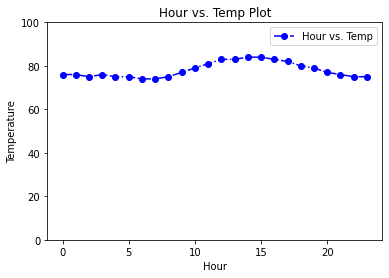

In [43]:
%matplotlib inline
df1=df[df["day"]==28]
fig, ax = plt.subplots()

# Step 3: Specify the x and y coordinates from the DataFrame
x = df1['hour']
y = df1['temperature']

# Step 4: Customize the plot (optional)
ax.plot(x, y, marker='o', linestyle='-.', color='b', label='Hour vs. Temp')
ax.set_xlabel('Hour')
ax.set_ylabel('Temperature')
ax.set_title('Hour vs. Temp Plot')
ax.legend()

ax.set_ylim(0, 100)

# Step 5: Display the plot
plt.show()

In [44]:
df["shortForecast"].value_counts()

Chance Rain Showers                        42
Slight Chance Rain Showers                 30
Sunny                                      24
Mostly Clear                               20
Mostly Cloudy                              18
Partly Cloudy                              14
Partly Sunny                                4
Slight Chance Showers And Thunderstorms     4
Name: shortForecast, dtype: int64

In [45]:
print(json_data)

{
    "@context": [
        "https://geojson.org/geojson-ld/geojson-context.jsonld",
        {
            "@version": "1.1",
            "wx": "https://api.weather.gov/ontology#",
            "geo": "http://www.opengis.net/ont/geosparql#",
            "unit": "http://codes.wmo.int/common/unit/",
            "@vocab": "https://api.weather.gov/ontology#"
        }
    ],
    "type": "Feature",
    "geometry": {
        "type": "Polygon",
        "coordinates": [
            [
                [
                    -95.380418000000006,
                    29.759164500000001
                ],
                [
                    -95.380344500000007,
                    29.736403899999999
                ],
                [
                    -95.3541326,
                    29.736465599999999
                ],
                [
                    -95.354201099999997,
                    29.759226200000001
                ],
                [
                    -95.380418000000006,
 